In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
file1=r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_training_data.csv'
file2=r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_validation_data.csv'
diamond_training_data=pd.read_csv(file1)
diamond_validation_data=pd.read_csv(file2)
numeric_diamond_training_data = diamond_training_data[["carat", "depth", "table", "x", "y", "z"]]
numeric_diamond_validation_data = diamond_validation_data[["carat", "depth", "table", "x", "y", "z"]]

In [3]:
numeric_diamond_training_data

,carat,depth,table,x,y,z
0,1.00,61.8,56.0,6.38,6.43,3.96
1,2.18,62.5,55.0,8.31,8.34,5.20
2,0.53,62.2,54.0,5.18,5.23,3.24
3,0.30,61.5,57.0,4.31,4.34,2.66
4,0.76,58.3,62.0,6.12,5.95,3.52
...,...,...,...,...,...,...
1495,2.35,62.3,58.0,8.51,8.44,5.28
1496,0.42,62.2,56.0,4.81,4.77,2.98
1497,1.16,61.8,55.0,6.75,6.78,4.18
1498,0.55,60.3,57.0,5.32,5.37,3.23


In [4]:
numeric_diamond_validation_data

,carat,depth,table,x,y,z
0,0.51,61.5,57.0,5.11,5.16,3.16
1,0.70,61.5,57.0,5.64,5.68,3.48
2,1.09,62.5,59.0,6.54,6.57,4.10
3,1.80,61.8,57.0,7.83,7.79,4.83
4,0.71,60.9,57.0,5.74,5.76,3.50
...,...,...,...,...,...,...
495,1.50,62.5,58.0,7.21,7.28,4.53
496,0.52,63.5,57.0,5.08,5.13,3.24
497,0.54,62.2,61.0,5.24,5.15,3.23
498,1.01,63.1,58.0,6.40,6.31,4.01


In [5]:
def get_training_and_validation_mae(degree):
    poly = PolynomialFeatures(degree=degree)
    polynomial_diamond_training_data = poly.fit_transform(numeric_diamond_training_data)
    polynomial_diamond_validation_data = poly.fit_transform(numeric_diamond_validation_data)
    
    diamond_model = LinearRegression()
    diamond_model.fit(polynomial_diamond_training_data, diamond_training_data[["price"]])
    training_error = mean_absolute_error(diamond_model.predict(polynomial_diamond_training_data),  diamond_training_data[["price"]])
    validation_error = mean_absolute_error(diamond_model.predict(polynomial_diamond_validation_data), diamond_validation_data[["price"]])
    return training_error, validation_error

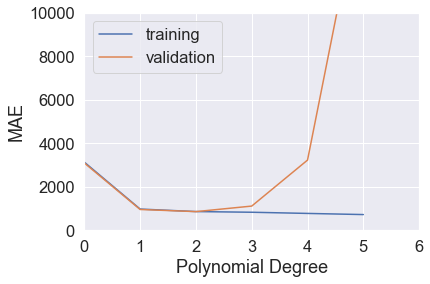

In [26]:
maes = np.array([get_training_and_validation_mae(i) for i in range(0, 6)])
plt.plot(maes[:, 0])
plt.plot(maes[:, 1])
plt.axis([0, 6, 0, 10000])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
fig = plt.gcf()
fig.savefig("mae_vs_complexity_example.png", dpi=300, bbox_inches = "tight")

In [27]:
def get_training_and_validation_mse(degree):
    poly = PolynomialFeatures(degree=degree)
    polynomial_diamond_training_data = poly.fit_transform(numeric_diamond_training_data)
    polynomial_diamond_validation_data = poly.fit_transform(numeric_diamond_validation_data)
    
    diamond_model = LinearRegression()
    diamond_model.fit(polynomial_diamond_training_data, diamond_training_data[["price"]])
    training_error = mean_squared_error(diamond_model.predict(polynomial_diamond_training_data),  diamond_training_data[["price"]])
    validation_error = mean_squared_error(diamond_model.predict(polynomial_diamond_validation_data), diamond_validation_data[["price"]])
    return training_error, validation_error

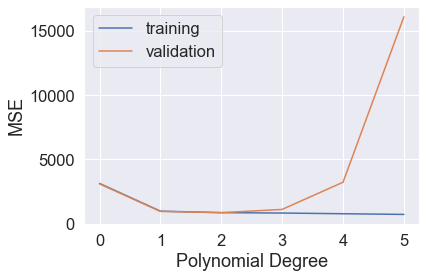

In [30]:
mses = np.array([get_training_and_validation_mae(i) for i in range(0, 6)])
plt.plot(maes[:, 0])
plt.plot(maes[:, 1])
plt.legend(["training", "validation"])
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
fig = plt.gcf()
fig.savefig("mse_vs_complexity_example.png", dpi=300, bbox_inches = "tight")

In [31]:
diamond_lm=LinearRegression(fit_intercept=False)
diamond_lm.fit(numeric_diamond_training_data, diamond_training_data['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [32]:
diamond_lm.coef_

array([10929.22839108,   102.63351882,   -68.58659808, -4337.56181477,
        5726.98390592, -4264.46705819])

In [33]:
diamond_lrm=linear_model.Ridge(alpha=1, fit_intercept=False)
diamond_lrm.fit(numeric_diamond_training_data, diamond_training_data['price'])

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
diamond_lrm.coef_

array([ 9982.92218626,    70.87249868,   -59.86772488, -2858.44145593,
        3873.86898816, -3032.30595989])

In [35]:
ss=StandardScaler()
ss.fit(numeric_diamond_training_data)
scaled_numeric_diamond_training_data=ss.transform(numeric_diamond_training_data)

In [36]:
scaled_numeric_diamond_training_data

array([[ 0.40699664,  0.08570641, -0.65913598,  0.55500569,  0.60192185,
         0.58918337],
       [ 2.90659436,  0.59760475, -1.12355608,  2.29996541,  2.33910941,
         2.40184537],
       [-0.58860583,  0.37821974, -1.58797619, -0.52994336, -0.48950489,
        -0.46333005],
       ...,
       [ 0.74592515,  0.08570641, -1.12355608,  0.88953164,  0.92025465,
         0.91078469],
       [-0.54623977, -1.01121861, -0.19471587, -0.40336597, -0.36217177,
        -0.47794829],
       [-0.50387371, -1.15747527, -0.65913598, -0.33103604, -0.31669566,
        -0.44871181]])

In [37]:
diamond_lrms=linear_model.Ridge(alpha=1, fit_intercept=False)
diamond_lrms.fit(scaled_numeric_diamond_training_data, diamond_training_data['price'])

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
diamond_lrms.coef_

array([ 5037.85377372,   -18.43159469,  -157.06975023, -3309.51865518,
        3571.6046855 , -1552.60486515])

In [39]:
scale_ridge_model_pipeline=Pipeline([
    ('scale', StandardScaler()),
    ('model', linear_model.Ridge(alpha=1, fit_intercept=False))
])
scale_ridge_model_pipeline.fit(numeric_diamond_training_data, diamond_training_data['price'])

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [40]:
scale_ridge_model_pipeline.named_steps['model'].coef_

array([ 5037.85377372,   -18.43159469,  -157.06975023, -3309.51865518,
        3571.6046855 , -1552.60486515])

In [41]:
def get_diamond_ridge_training_and_validation_mae(alpha):
    scale_poly_fit_pipeline=Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])
    scale_poly_fit_pipeline.fit(numeric_diamond_training_data, diamond_training_data['price'])
    
    training_mae=mean_absolute_error(scale_ridge_model_pipeline.predict(numeric_diamond_training_data), diamond_training_data['price'])
    validation_mae=mean_absolute_error(scale_ridge_model_pipeline.predict(numeric_diamond_validation_data), diamond_validation_data['price'])
    return training_mae, validation_mae

In [42]:
def get_diamond_ridge_training_and_validation_mse(alpha):
    scale_poly_fit_pipeline=Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(2)),
        ('model', linear_model.Ridge(alpha=alpha, fit_intercept=False))
    ])
    scale_poly_fit_pipeline.fit(numeric_diamond_training_data, diamond_training_data['price'])
    
    training_mse=mean_squared_error(scale_ridge_model_pipeline.predict(numeric_diamond_training_data), diamond_training_data['price'])
    validation_mse=mean_squared_error(scale_ridge_model_pipeline.predict(numeric_diamond_validation_data), diamond_validation_data['price'])
    return training_mse, validation_mse

Text(0, 0.5, 'MAE')

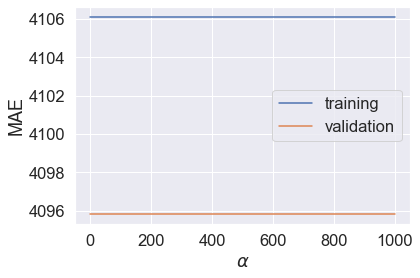

In [43]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mae(alpha) for alpha in alphas])
plt.plot(alphas, mses[:, 0])
plt.plot(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

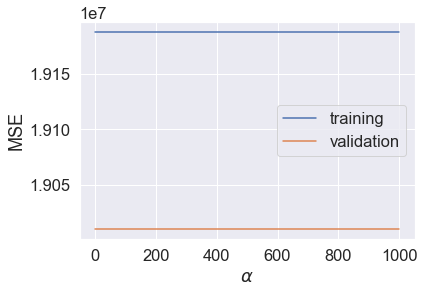

In [44]:
alphas = 10**np.linspace(3, -3, 100)
mses = np.array([get_diamond_ridge_training_and_validation_mse(alpha) for alpha in alphas])
plt.plot(alphas, mses[:, 0])
plt.plot(alphas, mses[:, 1])
plt.legend(["training", "validation"])
plt.xlabel(r'$\alpha$')
plt.ylabel('MSE')